<a href="https://colab.research.google.com/github/PrazaKembaren/Eksoplanet-Tugas-1-RBL/blob/main/%5BAK3221%5D_Eksoplanet_Tugas_Pengolahan_dan_Analisis_Data_Eksoplanet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RBL Eksoplanet: Pengolahan dan Analisis Data Eksoplanet

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [ ]:
s1 = pd.read_csv("/content/51Peg.txt", sep="\s+", header=None,
                 names=["time", "RV", "unc", "Obs"])
jd = s1['time']
rv = s1['RV']
er = s1['unc']


s2 = pd.read_csv("/content/HD3651.txt", sep="\s+", header=None,
                 names=["time", "RV", "unc", "Obs"])
jd2 = s2['time']
rv2 = s2['RV']
er2 = s2['unc']

## 51 Peg

<ipython-input-4-28c1b540ef61>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


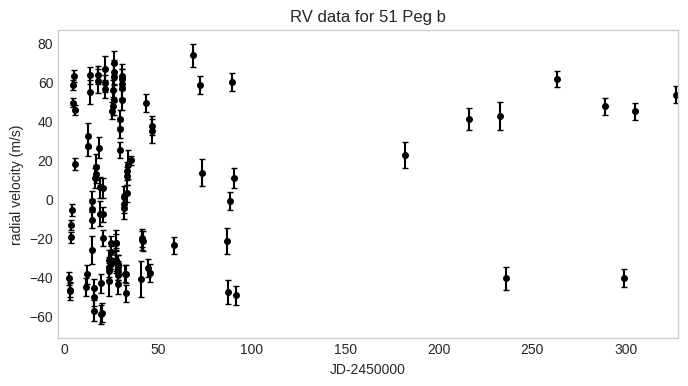

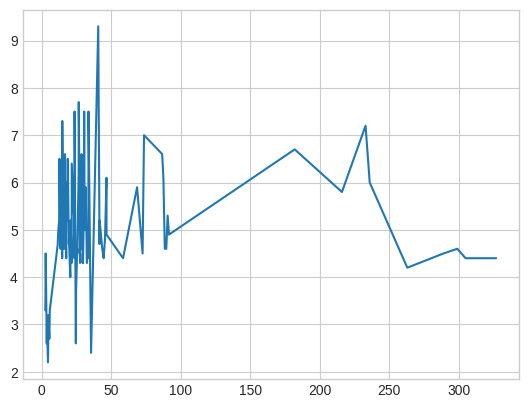

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,4))
#plt.scatter(s1['time'], s1['RV'])
plt.errorbar(s1['time'], s1['RV'], yerr=s1['unc'], fmt='ok', markersize=4,capsize=2,  ecolor="k");
plt.xlabel("JD-2450000")
plt.ylabel("radial velocity (m/s)")
plt.xlim(min(s1['time']-6), max(s1['time']+1))
plt.grid()
plt.title("RV data for 51 Peg b")
plt.savefig("rawdata51Peg.png", dpi=300)
plt.show()
plt.plot(s1['time'], s1['unc'])


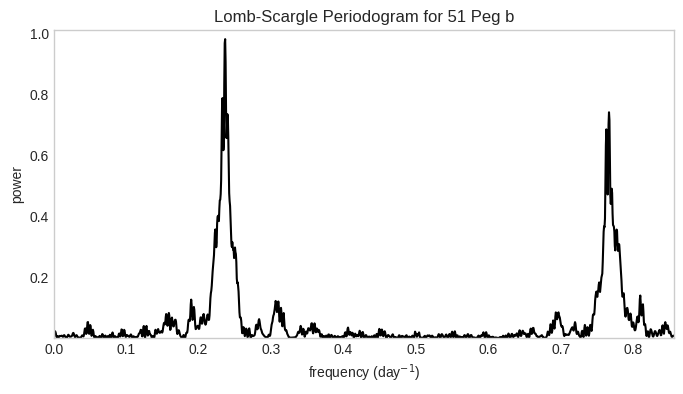

In [ ]:
from astropy.timeseries import LombScargle

freq,pow = LombScargle(s1['time'], s1['RV']).autopower()
plt.figure(figsize=(8,4))
plt.xlim(0, max(freq))
plt.ylim(min(pow), max(pow)+0.03)
plt.plot(freq,pow,color='k')

plt.xlabel("frequency (day$^{-1}$)")
plt.ylabel("power")
plt.title("Lomb-Scargle Periodogram for 51 Peg b")
plt.grid()
plt.savefig("Lombscargl51Peg.png", dpi=300)

In [ ]:
#menemukan frekuensi optimum saat frekuensi memiliki power terbesar

opfreq = freq[np.argmax(pow)]

opperiod = 1/opfreq

print(opfreq)

print(f"Periode paling optimum yang diperoleh adalah : {opperiod} hari")


0.2365660479606048
Periode paling optimum yang diperoleh adalah : 4.22714928292047 hari


In [ ]:
print(f"{s1 ['time'] % opperiod}")

0      2.673650
1      2.808730
2      2.959790
3      3.626950
4      3.732650
         ...   
106    0.907744
107    1.486849
108    3.022550
109    0.534252
110    1.405505
Name: time, Length: 111, dtype: float64


<ipython-input-8-655302d67b8a>:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(s1['time'] % opperiod, s1['RV'], c='b',yerr=s1['unc'], fmt='.b')


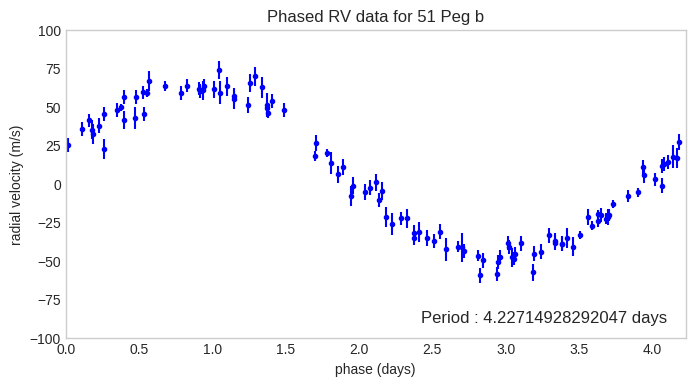

In [ ]:
plt.figure(figsize=(8,4))
plt.title("Phased RV data for 51 Peg b")
plt.xlim(0, opperiod)
plt.ylim(-100, 100)
plt.xlabel("phase (days)")
plt.ylabel("radial velocity (m/s)")
plt.text(4.1, -90, f"Period : {opperiod} days", horizontalalignment='right', fontsize=12)
plt.grid()
plt.errorbar(s1['time'] % opperiod, s1['RV'], c='b',yerr=s1['unc'], fmt='.b')

plt.savefig("51Peg.png", dpi=300)
plt.show()

#plt.plot(s1['JD'] % opperiod, f, c='r', linestyle=":", label="Fit")

<ipython-input-9-45fb53dbce23>:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".b" (-> color='b'). The keyword argument will take precedence.
  plt.errorbar(phase/opperiod, s1['RV'], c='b',yerr=s1['unc'], fmt='.b')


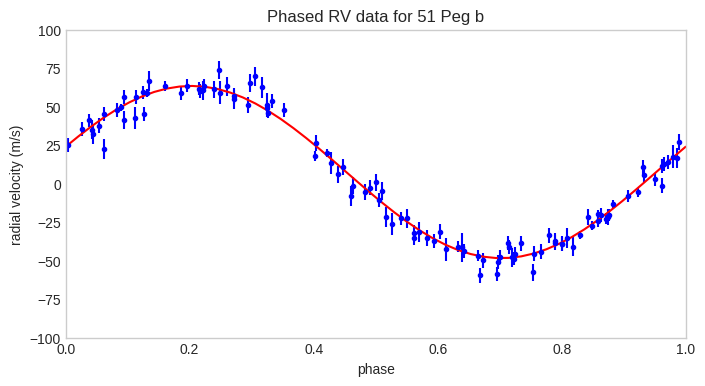

63.401223988796914


In [ ]:
tfit = np.linspace(0, opperiod)
rvfit = LombScargle(s1['time'], s1['RV'], s1['unc']).model(tfit, opfreq)
phase = s1['time'] % opperiod

plt.figure(figsize=(8,4))
plt.title("Phased RV data for 51 Peg b")
plt.xlim(0, 1)
plt.ylim(-100, 100)
plt.xlabel("phase")
plt.ylabel("radial velocity (m/s)")

plt.grid()
plt.errorbar(phase/opperiod, s1['RV'], c='b',yerr=s1['unc'], fmt='.b')
plt.plot(tfit/opperiod,rvfit,'-r')
plt.savefig("51Peg2.png", dpi=300)
plt.show()

print(max(rvfit))


In [ ]:
#diketahui massa matahari adalah 1.12 Msun

Ms = 1.1*1.989e+30
Msun = 1.989e+30

#definisi (untuk mempermudah)

K =  0.5*(np.max(rvfit)-np.min(rvfit))
P = opperiod*86400
G = 6.67*10**-11

def1 = P/(2*np.pi*G)

Mp = K*def1**(1/3)*Ms**(2/3)
P = opperiod
print(Mp)

#e = np.sqrt(1-Mp**2)
print(Mp/Msun, f"massa Matahari atau : {(Mp/Msun)*1047.57} massa Jupiter")
#print(e)

8.992936647950506e+26
0.00045213356701611393 massa Matahari atau : 0.47364156079907044 massa Jupiter


In [ ]:
#a = (G*Ms*(P/2*np.pi)**2)**(1/3)
#print(a)

In [ ]:
w = 0
e = 0
tau = jd[np.argmax(rv)]
vr0 = np.mean(rvfit)

In [ ]:
def solve_kepler(M,e):
  eanom = np.zeros(M.shape)
  for i,mi in enumerate(M):
    tmp,=fsolve(lambda E: E-e*np.sin(E)-mi,mi)
    eanom[i] = tmp
  return eanom

def keplerian_fit(t,K,P,e,w,tau,vr0):
    e_anomaly = solve_kepler((t-tau)*2*np.pi/P,e)
    theta = 2*np.arctan2(np.sqrt(1.+e)*np.sin(0.5*e_anomaly),
                         np.sqrt(1.-e)*np.cos(0.5*e_anomaly))
    return K*(np.cos(theta+w)+e*np.cos(w))+vr0

guess = (K,P,e,w,tau,vr0)
popt,pcov = curve_fit(keplerian_fit, jd, rv, sigma=er, absolute_sigma=True, p0=guess)
(K,P,e,w,tau,vr0) = popt
rvfit = keplerian_fit(jd, K,P,e,w,tau,vr0)

chisq = np.sum(((rv-rvfit)/er)**2)
print("Chi-squared of least-squares fit is %10.5f" % chisq)
if e<0:
    w -= np.pi
    e *= -1
w_deg = w*180/np.pi
asini = (K*(Ms+Mp)*np.sqrt(1-e**2)*P)/(Mp*2*np.pi)
print(K,P,e,w,w_deg,tau+2450000,vr0,asini)

Chi-squared of least-squares fit is  108.23769
56.05199636558025 4.230604659193485 0.015080532818582777 119.90924308148928 6870.293553177601 2450151.370925072 7.329711121521103 91847.78266969755


## HD 3651


<ipython-input-14-c041631f03cf>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


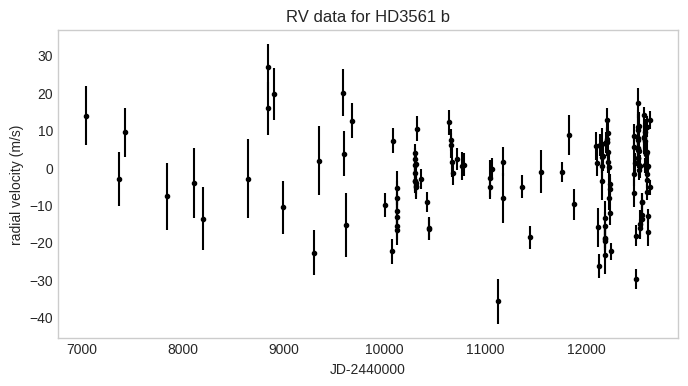

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,4))
#plt.scatter(s1['time'], s1['RV'])
plt.errorbar(s2['time'], s2['RV'], yerr=s2['unc'], fmt='.k');
plt.xlabel("JD-2440000")
plt.ylabel("radial velocity (m/s)")
plt.grid()
plt.title("RV data for HD3561 b")
plt.savefig("rawdatahd3651.png", dpi=300)

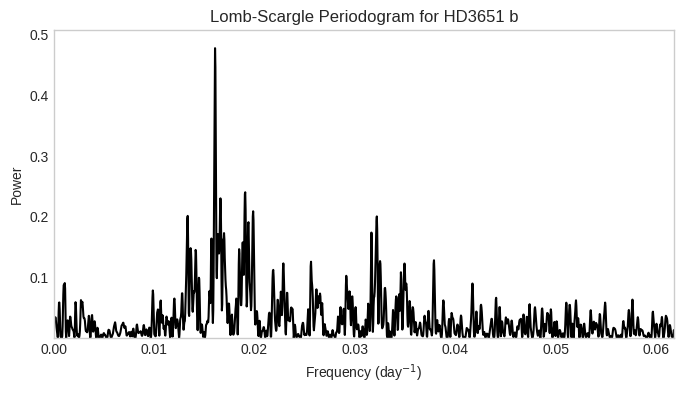

In [ ]:
from astropy.timeseries import LombScargle

freq,pow = LombScargle(s2['time'], s2['RV']).autopower()
plt.figure(figsize=(8,4))
plt.plot(freq,pow,color='k')
plt.xlabel("Frequency (day$^{-1}$)")
plt.xlim(0, max(freq))
plt.ylim(min(pow), max(pow)+0.03)
plt.ylabel("Power")
plt.title("Lomb-Scargle Periodogram for HD3651 b")
plt.grid()
plt.savefig("LombScargle-HD3651.png", dpi=300)

In [ ]:
#menemukan frekuensi optimum saat frekuensi memiliki power terbesar

opfreq = freq[np.argmax(pow)]

opperiod = 1/opfreq

print(opfreq)

print(f"Periode paling optimum yang diperoleh adalah : {opperiod} hari")

0.016064369229049972
Periode paling optimum yang diperoleh adalah : 62.249565217391286 hari


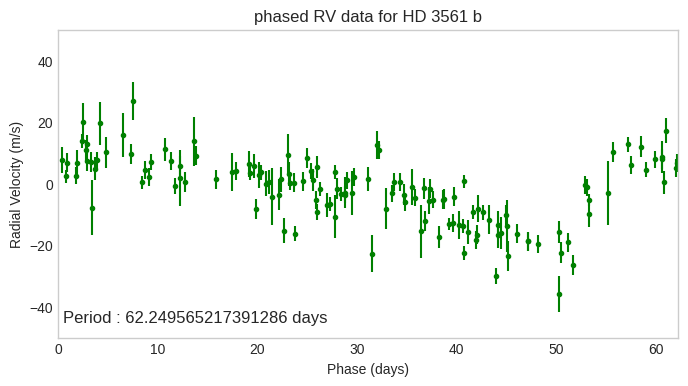

In [ ]:
plt.figure(figsize=(8,4))
plt.title("phased RV data for HD 3561 b")
plt.xlim(0, opperiod)
plt.ylim(-50, 50)
plt.xlabel("Phase (days)")
plt.ylabel("Radial Velocity (m/s)")
plt.text(27, -45, f"Period : {opperiod} days", horizontalalignment='right', fontsize=12)
plt.grid()
plt.errorbar(s2['time'] % opperiod, s2['RV'], fmt='.g',yerr=s2['unc'])
#plt.plot(s1['JD'] % opperiod, f, c='r', linestyle=":", label="Fit")
plt.savefig("HD3651.png", dpi=300)

<ipython-input-18-57d846e35ffc>:12: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".g" (-> color='g'). The keyword argument will take precedence.
  plt.errorbar(phase/opperiod, s2['RV'], c='g',yerr=s2['unc'], fmt='.g')


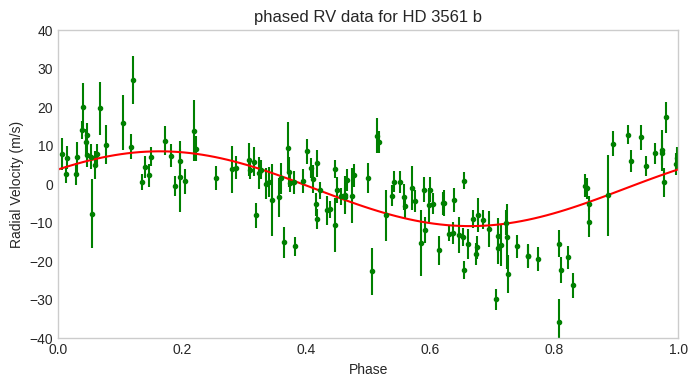

In [ ]:
tfit = np.linspace(0, opperiod, 100)
rvfit = LombScargle(s2['time'], s2['RV'], s2['unc']).model(tfit, 1/opperiod)
phase = s2['time'] % opperiod

plt.figure(figsize=(8,4))
plt.title("phased RV data for HD 3561 b")
plt.xlim(0, 1)
plt.ylim(-40, 40)
plt.xlabel("Phase")
plt.ylabel("Radial Velocity (m/s)")
plt.grid()
plt.errorbar(phase/opperiod, s2['RV'], c='g',yerr=s2['unc'], fmt='.g')
plt.plot(tfit/opperiod,rvfit,'-r')
plt.savefig("HD3651-2.png", dpi=300)


In [ ]:
Msun = 1.989e+30
Ms = 0.88825229926100002*Msun


#definisi (untuk mempermudah)

K = 0.5*(np.max(rvfit)-np.min(rvfit))
P = opperiod*86400
G = 6.67*10**-11

def1 = (P/(2*np.pi*G))**(1/3)

Mp = K*def1*Ms**(2/3)
Mpsini = np.abs((Mp/Msun)*1047.57)

P = opperiod

#e = np.sqrt(1 - (Mpsini*(1/4.919*10**(-3))*P**(-1/3)*(Mp+Ms)**(-2/3)/K)**2)
#print(e)

print(Mp/Msun, f"massa Matahari atau : {np.abs((Mp/Msun)*1047.57)} massa Jupiter", K)



0.00016706406997031204 massa Matahari atau : 0.17501130777879978 massa Jupiter 9.711559395273488


In [ ]:
w = 0
e = 0
tau = jd2[np.argmax(rv2)]
vr0 = np.mean(rvfit)


In [ ]:
def solve_kepler(M,e):
  eanom = np.zeros(M.shape)
  for i,mi in enumerate(M):
    tmp,=fsolve(lambda E: E-e*np.sin(E)-mi,mi)
    eanom[i] = tmp
  return eanom

def keplerian_fit(t,K,P,e,w,tau,vr0):
    e_anomaly = solve_kepler((t-tau)*2*np.pi/P,e)
    theta = 2*np.arctan2(np.sqrt(1.+e)*np.sin(0.5*e_anomaly),
                         np.sqrt(1.-e)*np.cos(0.5*e_anomaly))
    return K*(np.cos(theta+w)+e*np.cos(w))+vr0

guess = (K,P,e,w,tau,vr0)
popt,pcov = curve_fit(keplerian_fit, jd2, rv2, sigma=er2, absolute_sigma=True, p0=guess)
(K,P,e,w,tau,vr0) = popt
rvfit = keplerian_fit(jd2, K,P,e,w,tau,vr0)

chisq = np.sum(((rv2-rvfit)/er2)**2)
print("Chi-squared of least-squares fit is %10.5f" % chisq)
if e<0:
    w -= np.pi
    e *= -1
w_deg = w*180/np.pi

print(K,P,e,w,w_deg,tau+2440000,vr0)

Chi-squared of least-squares fit is  438.63088
16.276595023591465 62.231339309332775 0.6291735642867842 85.79101186158708 4915.462899825724 2449700.9097984917 -2.0635047249786256


In [ ]:
asini = (K*((Ms/1.989e+30)+(Mp/1.989e+30))*np.sqrt(1-e**2)*P*86400)/((Mp/1.989e+30)*2*np.pi)
print(asini)

57571899505.07442
